# Figure 8

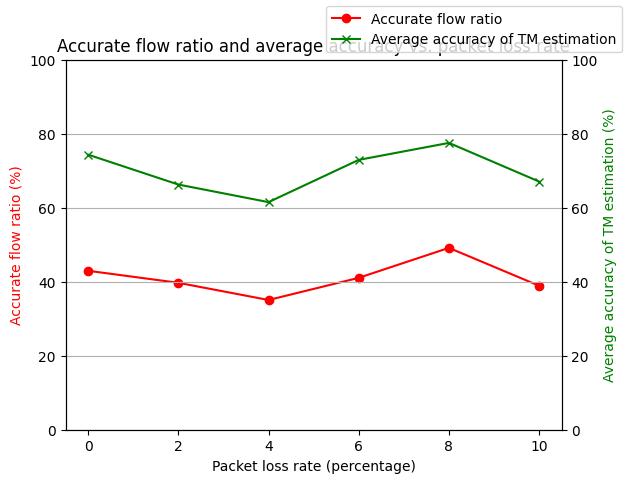

,Packet Loss Rate,Accurate Flow Ratio,Average Accuracy
0,0.00,0.4300,0.744150
1,0.02,0.3975,0.663342
2,0.04,0.3510,0.615752
3,0.06,0.4110,0.730107
4,0.08,0.4920,0.776026
5,0.10,0.3895,0.671422


In [7]:
import json
import os
import pandas as pd
import matplotlib.pyplot as plt
import time

def calculate_accurate_flow_ratio_and_average_accuracy(flow_stats_file, trafgen_stats_file):
    # Load the JSON data
    with open(flow_stats_file, 'r') as f:
        flow_stats = json.load(f)
        
    with open(trafgen_stats_file, 'r') as f:
        trafgen_stats = json.load(f)
    
    # Initialize counters
    accurate_flow_count = 0
    total_flows = 0
    accuracy_sum = 0

    # Calculate accurate flow ratio and average accuracy
    for flow_id, flow_stat in flow_stats.items():
        if flow_id == "1000000000":
            continue
    
        total_flows += 1
        if flow_id in trafgen_stats:
            trafgen_stat = trafgen_stats[flow_id]
            if trafgen_stat == 0:
                continue
            error_rate = abs(flow_stat - trafgen_stat) / trafgen_stat
            accuracy = 1 - error_rate
            if flow_stat == trafgen_stat or error_rate < 0.05:
                accurate_flow_count += 1
            
            accuracy_sum += accuracy
    
    accurate_flow_ratio = accurate_flow_count / total_flows if total_flows > 0 else 0
    average_accuracy = accuracy_sum / total_flows if total_flows > 0 else 0

    return accurate_flow_ratio, average_accuracy

# Define the packet loss ratios and corresponding files
packet_loss_ratios = [0, 0.02, 0.04, 0.06, 0.08, 0.1]
flow_stats_files = [f'stats/flow_stats_{ratio}.json' for ratio in packet_loss_ratios]
trafgen_stats_files = [f'stats/trafgen_stats_{ratio}.json' for ratio in packet_loss_ratios]

# Initialize results list
results = []

# Define the packet loss ratios and corresponding files
packet_loss_ratios = [0, 0.02, 0.04, 0.06, 0.08, 0.1]
flow_stats_files = [f'stats/flow_stats_{ratio}.json' for ratio in packet_loss_ratios]
trafgen_stats_files = [f'stats/trafgen_stats_{ratio}.json' for ratio in packet_loss_ratios]

# Initialize results list
results = []

# Calculate metrics for each packet loss ratio
for ratio, flow_file, trafgen_file in zip(packet_loss_ratios, flow_stats_files, trafgen_stats_files):
    accurate_flow_ratio, average_accuracy = calculate_accurate_flow_ratio_and_average_accuracy(flow_file, trafgen_file)
    results.append([ratio, accurate_flow_ratio, average_accuracy])

# Save results to a CSV file
results_df = pd.DataFrame(results, columns=['Packet Loss Rate', 'Accurate Flow Ratio', 'Average Accuracy'])
# Save results to CSV
timestamp = time.strftime("%Y%m%d-%H%M%S")
filename = f"data/accuracy_results_{timestamp}.csv"
results_df.to_csv(filename, index=False)

# Plot the results
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.plot(results_df['Packet Loss Rate'] * 100, results_df['Accurate Flow Ratio'] * 100, 'r-', marker='o')
ax2.plot(results_df['Packet Loss Rate'] * 100, results_df['Average Accuracy'] * 100, 'g-', marker='x')

ax1.set_xlabel('Packet loss rate (percentage)')
ax1.set_ylabel('Accurate flow ratio (%)', color='r')
ax2.set_ylabel('Average accuracy of TM estimation (%)', color='g')

plt.title('Accurate flow ratio and average accuracy vs. packet loss rate')
ax1.set_ylim(0, 100)
ax2.set_ylim(0, 100)

fig.legend(['Accurate flow ratio', 'Average accuracy of TM estimation'], loc='upper right')
plt.grid(True)
plt.show()

# Display the dataframe
results_df

KeyError: 'Packet Loss Rate'

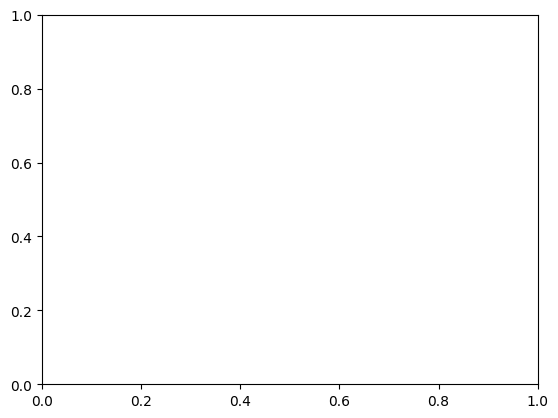

In [24]:
# Adjust the plotting range and style to better display the y-axis for all packet loss rates
fig, ax1 = plt.subplots()

# Plot Accurate Flow Ratio
ax1.plot(df["Packet Loss Rate"] * 100, df["Accurate Flow Ratio"] * 100, 'r+-', label="Accurate flow ratio")
ax1.set_xlabel('Packet loss rate (percentage)')
ax1.set_ylabel('Accurate flow ratio', color='r')
ax1.tick_params(axis='y', labelcolor='r')
ax1.set_ylim(0, 100)  # Adjust y-axis limits to start from 0

# Plot Average Accuracy
ax2 = ax1.twinx()
ax2.plot(df["Packet Loss Rate"] * 100, df["Average Accuracy"] * 100, 'gx-', label="Average accuracy of TM estimation")
ax2.set_ylabel('Average accuracy of TM estimation', color='g')
ax2.tick_params(axis='y', labelcolor='g')
ax2.set_ylim(50, 100)  # Adjust y-axis limits to start from 50

# Add legend
fig.legend(loc="upper right", bbox_to_anchor=(1, 1))

plt.show()
